## Setup


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [3]:
nx = 21
nt = 21
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_increase'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

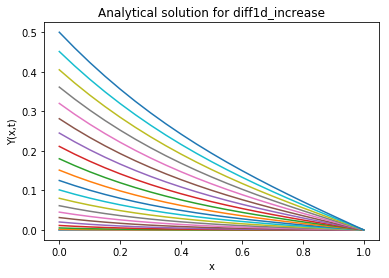

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
# plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [7]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000032
         Iterations: 3262
         Function evaluations: 3507
         Gradient evaluations: 3507
31min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 3.1543328422877306e-05
 hess_inv: array([[ 3.72295882e+02,  9.54831250e+02, -9.41037324e+01, ...,
         6.48327687e+03,  1.89772082e+01, -6.11791661e+03],
       [ 9.54831296e+02,  7.87653574e+04, -8.03601722e+02, ...,
         7.43058588e+03,  6.08623282e+01,  7.21116426e+03],
       [-9.41037286e+01, -8.03601691e+02,  4.12204701e+02, ...,
        -1.14407894e+03, -1.00381498e+01,  1.04106545e+03],
       ...,
       [ 6.48327680e+03,  7.43058480e+03, -1.14407912e+03, ...,
         3.11820880e+05,  6.27868028e+02, -2.14321717e+05],
       [ 1.89772081e+01,  6.08623247e+01, -1.00381503e+01, ...,
         6.27868031e+02,  1.96903795e+00, -4.31019116e+02],
       [-6.11791654e+03,  7.21116510e+03,  1.04106558e+03, ...,
        -2.1432

Text(0.5, 0, 'x')

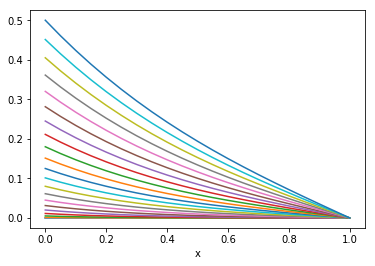

In [8]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x') 

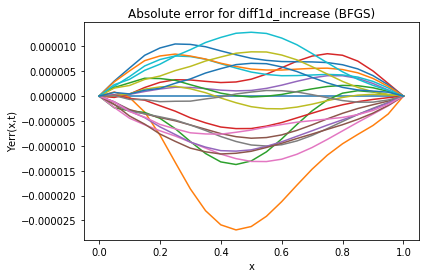

In [10]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
# plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


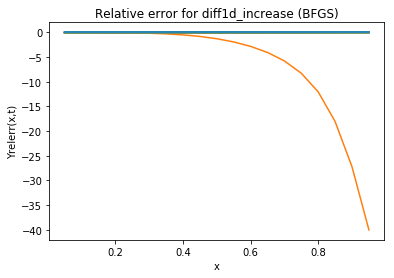

In [11]:
Yrelerr1 = (Yt1[:, 1:-1] - Ya[:, 1:-1])/Ya[:, 1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
# plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [12]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

         Current function value: 0.000016
         Iterations: 8000
         Function evaluations: 8625
         Gradient evaluations: 8625
1h 27min 56s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.5850081302275058e-05
 hess_inv: array([[ 1.44684480e+03,  5.00705949e+02, -2.61580356e+01, ...,
         2.38860481e+04,  3.78418655e+02, -3.94320978e+03],
       [ 5.00705901e+02,  2.04161378e+05, -1.79975815e+04, ...,
         2.62449911e+05, -1.13449105e+02, -6.79374183e+04],
       [-2.61580039e+01, -1.79975813e+04,  4.39436338e+03, ...,
        -3.39540002e+04,  9.54971694e+01,  3.52641774e+03],
       ...,
       [ 2.38860482e+04,  2.62449911e+05, -3.39540009e+04, ...,
         1.15451504e+06,  1.18621297e+04, -2.52117039e+05],
       [ 3.78418658e+02, -1.13449099e+02,  9.54971633e+01, ...,
         1.18621297e+04,  2.70412965e+02, -2.80152010e+03],
       [-3.94320978e+03, -6.79374182e+04,  3.52641800e+03, ...,
        -2.52117038e+05, -2.80152010e+03,  8.8112

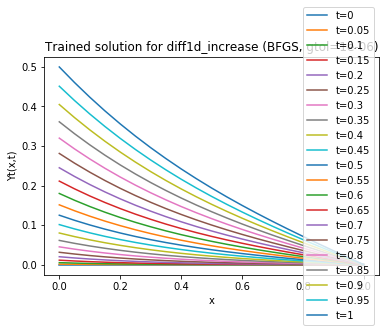

In [13]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

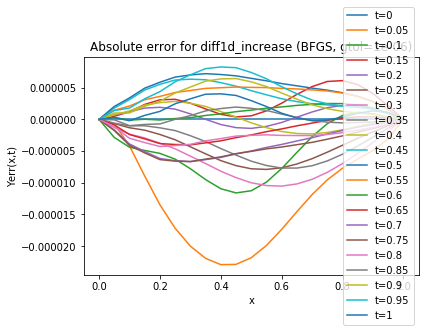

In [14]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


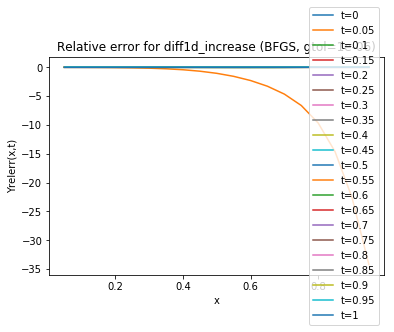

In [15]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-6, maxiter=16000)

In [8]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
options['maxiter'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 13188
         Function evaluations: 14273
         Gradient evaluations: 14273
2h 36min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.3049727251126597e-05
 hess_inv: array([[ 9.40452242e+03,  8.52615213e+02,  2.40809777e+04, ...,
         8.58758813e+04,  5.56616465e+02, -1.08534805e+05],
       [ 8.52617078e+02,  3.51858050e+05, -2.94384943e+04, ...,
        -6.66521422e+05,  3.26545903e+03, -3.15362476e+05],
       [ 2.40809795e+04, -2.94384953e+04,  1.45907516e+05, ...,
        -9.79465030e+04,  6.27771777e+03, -2.54280061e+05],
       ...,
       [ 8.58758505e+04, -6.66521268e+05, -9.79465549e+04, ...,
         2.16778567e+07, -1.44845813e+05,  3.58718534e+06],
       [ 5.56616419e+02,  3.26545712e+03,  6.27771725e+03, ...,
        -1.44845792e+05,  2.60818568e+03, -3.72225440e+04],
       [-1.08534808e+05, -3.15362365e+05, -2.54280026e+05, ...,
         

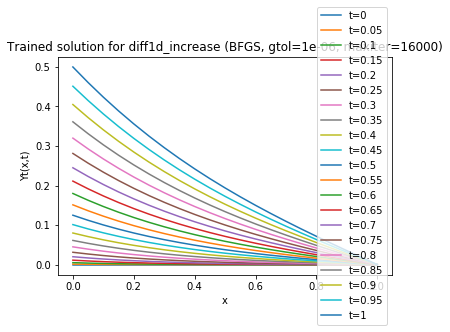

In [9]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

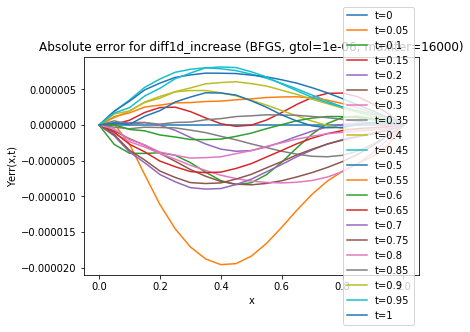

In [10]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


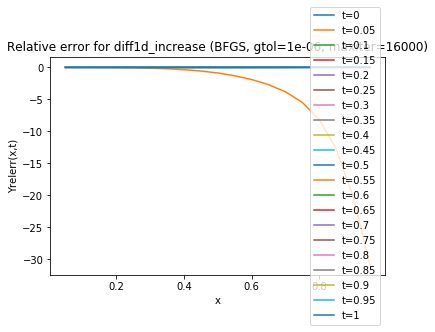

In [11]:
Yrelerr3 = (Yt3[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

## BFGS (gtol=1e-8, maxiter=16000)

In [12]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

         Current function value: 0.000012
         Iterations: 16000
         Function evaluations: 17340
         Gradient evaluations: 17340
2h 33min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.235275890946808e-05
 hess_inv: array([[ 1.50422736e+03,  6.26261989e+03,  3.00301167e+03, ...,
         7.85955581e+04, -3.01394035e+02, -2.71175050e+04],
       [ 6.26261981e+03,  2.29476979e+05,  3.53667677e+03, ...,
         3.73574497e+05, -3.22417535e+03, -2.45272378e+05],
       [ 3.00301178e+03,  3.53667710e+03,  3.08685872e+04, ...,
         2.04292217e+05,  4.04098917e+01, -4.52903883e+04],
       ...,
       [ 7.85955581e+04,  3.73574495e+05,  2.04292211e+05, ...,
         7.72242044e+06,  2.69626614e+03, -2.16987685e+06],
       [-3.01394033e+02, -3.22417536e+03,  4.04098969e+01, ...,
         2.69626608e+03,  5.42561641e+02,  4.09488461e+03],
       [-2.71175048e+04, -2.45272378e+05, -4.52903849e+04, ...,
        -2.16987685e+06,  4.09488462e+03,  8.29

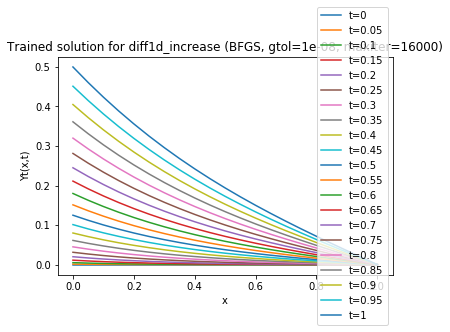

In [13]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

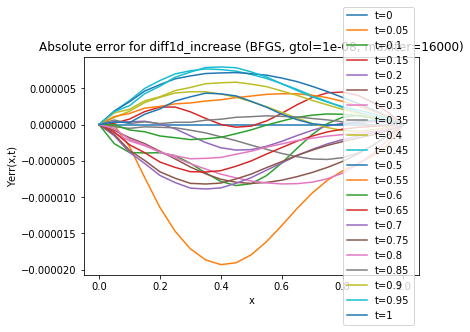

In [14]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


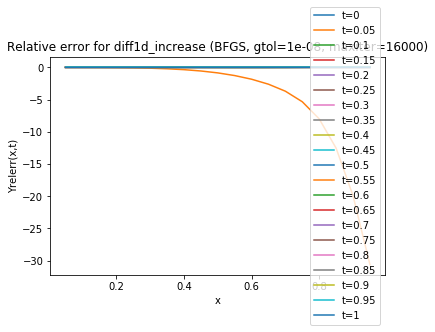

In [15]:
Yrelerr4 = (Yt4[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

## BFGS (gtol=1e-8, maxiter=32000)

In [6]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

         Current function value: 0.000010
         Iterations: 25584
         Function evaluations: 27805
         Gradient evaluations: 27794
5h 14min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.0324495229865947e-05
 hess_inv: array([[ 3.66933563e+03, -2.55816158e+01,  1.24356915e+04, ...,
         1.31562044e+07, -1.09440030e+03, -1.63943163e+06],
       [-3.29590540e+01,  5.14906978e+05, -6.52265131e+03, ...,
        -3.12724994e+07,  1.17779939e+03,  3.19735869e+06],
       [ 1.24350922e+04, -6.55175848e+03,  1.52940740e+05, ...,
         4.16056011e+07,  4.92270499e+02, -5.22004366e+06],
       ...,
       [ 1.31559777e+07, -3.12187421e+07,  4.16232056e+07, ...,
         8.56721373e+10, -6.31312579e+06, -1.06867926e+10],
       [-1.09404103e+03,  1.16773232e+03,  4.92489328e+02, ...,
        -6.31302526e+06,  1.01883480e+03,  8.03156077e+05],
       [-1.63937494e+06,  3.19061370e+06, -5.22222951e+06, ...,
        -1.06866917e+10,  8.03143870e+05,  1.3

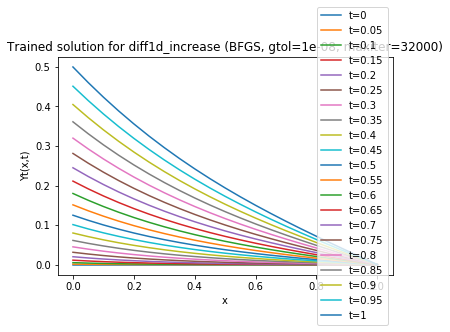

In [7]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

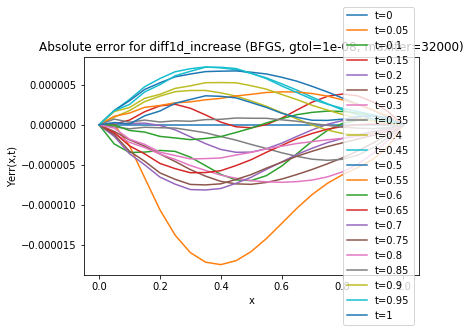

In [8]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


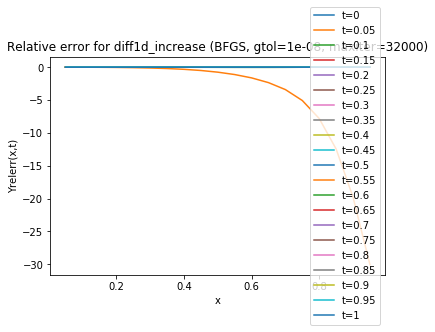

In [9]:
Yrelerr5 = (Yt5[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));